#### Business goal:

Check the case_study_gnod.md file.

Make sure you've understood the big picture of your project:

the goal of the company (Gnod),
their current product (Gnoosic),
their strategy, and
how your project fits into this context.
Re-read the business case and the e-mail from the CTO, take a look at the flowchart and create an initial Trello board with the tasks you think you'll have to accomplish.



**Instructions - Scraping popular songs**

Your product will take a song as an input from the user and will output another song (the recommendation). In most cases, the recommended song will have to be similar to the inputted song, but the CTO thinks that if the song is on the top charts at the moment, the user will enjoy more a recommendation of a song that's also popular at the moment.

You have find data on the internet about currently popular songs. Billboard maintains a weekly Top 100 of "hot" songs here: https://www.billboard.com/charts/hot-100.

It's a good place to start! Scrape the current top 100 songs and their respective artists, and put the information into a pandas dataframe.

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import math

import time

### Scrapping Billboard top songs

In [2]:
response = requests.get('https://www.billboard.com/charts/hot-100')
response.status_code

200

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
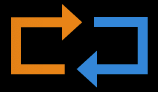

In [3]:
soup = BeautifulSoup(response.content, "html.parser")
soup

**Songs that are actually similar to the ones they picked from an acoustic point of view.**

**Songs that are popular around the world right now, independently from their tastes.**


In [4]:
#With the following code I can get the tag for all songs and artists

chart_results= soup.find_all('li', class_="lrv-u-width-100p")
chart_results

[<li class="lrv-u-width-100p">
 <ul class="lrv-a-unstyle-list lrv-u-flex lrv-u-height-100p lrv-u-flex-direction-column@mobile-max">
 <li class="o-chart-results-list__item // lrv-u-flex-grow-1 lrv-u-flex lrv-u-flex-direction-column lrv-u-justify-content-center lrv-u-border-b-1 u-border-b-0@mobile-max lrv-u-border-color-grey-light lrv-u-padding-l-1@mobile-max">
 <h3 class="c-title a-no-trucate a-font-primary-bold-s u-letter-spacing-0021 u-font-size-23@tablet lrv-u-font-size-16 u-line-height-125 u-line-height-normal@mobile-max a-truncate-ellipsis u-max-width-245 u-max-width-230@tablet-only u-letter-spacing-0028@tablet" id="title-of-a-story">
 
 	
 	
 		
 					Last Night		
 	
 </h3>
 <span class="c-label a-no-trucate a-font-primary-s lrv-u-font-size-14@mobile-max u-line-height-normal@mobile-max u-letter-spacing-0021 lrv-u-display-block a-truncate-ellipsis-2line u-max-width-330 u-max-width-230@tablet-only u-font-size-20@tablet">
 	
 	Morgan Wallen
 </span>
 </li>
 <li class="o-chart-results

In [5]:
def billboard_top100():
    # adding the url of the billboard chart
    response = requests.get('https://www.billboard.com/charts/hot-100')
    
    # parsing the html
    soup = BeautifulSoup(response.content, "html.parser")
    
    # finding the result tags
    chart_results = soup.find_all('li', class_="lrv-u-width-100p")
    
    songs = []
    artists = []
    
    for result in chart_results:
        song_elem = result.find('h3')
        artist_elem = result.find('span')
        
        if song_elem is not None and artist_elem is not None:
            song_name = song_elem.get_text(strip=True)
            artist = artist_elem.get_text(strip=True)
            
            songs.append(song_name)
            artists.append(artist)
        
    data = {'song': songs, 'artist': artists}
    df_billboard = pd.DataFrame(data)
    
    return df_billboard
        

In [6]:
df_billboard = billboard_top100()
df_billboard

song                             artist
0          Last Night                      Morgan Wallen
1            Fast Car                         Luke Combs
2           Calm Down                Rema & Selena Gomez
3             Flowers                        Miley Cyrus
4         All My Life         Lil Durk Featuring J. Cole
..                ...                                ...
95              Jaded                        Miley Cyrus
96        Abracadabra  Young Thug Featuring Travis Scott
97          Truck Bed                              HARDY
98            Save Me      Jelly Roll With Lainey Wilson
99  Gucci Grocery Bag                         Young Thug

[100 rows x 2 columns]

### Retreiving songs from my playlist

!pip install spotipy

In [7]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

### Playlist 1: Barenmusik 

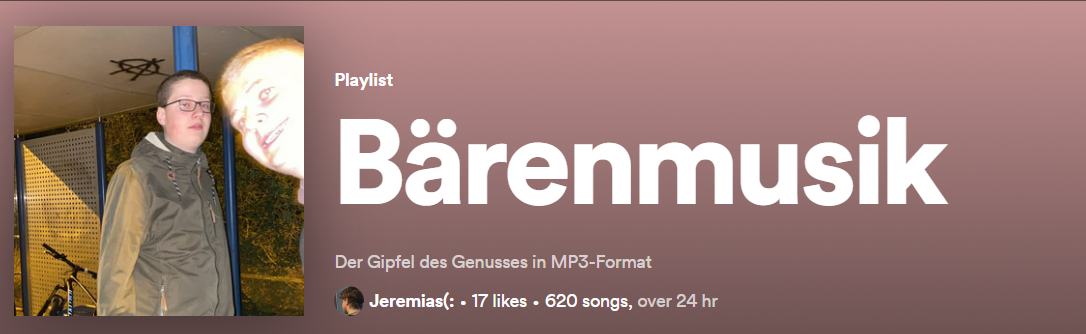

In [8]:
client_id="828da1a7c09144189cf814e3c738f55a"
client_secret="baaf17e643624100bcd1105ba9fb0f84"

playlist_id="64QxysD2w5x5EMLgcoT7fa"

def get_playlist_info(playlist_id, client_id, client_secret):
    
    # Authenticate with Spotify API
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))
    
    # Get playlist tracks
    playlist = sp.playlist_tracks(playlist_id)
    
    if playlist is None or 'items' not in playlist:
        print("Error: Unable to retrieve playlist tracks.")
        return None
    
    tracks = playlist['items']
    
    
    # Continue fetching additional tracks if available
    while playlist['next']:
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])
        # Adding a delay of 5 seconds between requests
        time.sleep(5) 
    
    
    # Initialize lists to store track information
    song_names = []
    song_ids = []
    artist_names = []
    audio_features = []
    
    # Iterate over tracks and retrieve information
    for track in tracks:
        # Get track details
        
        #playlist['items']['track']
        track_info = track['track']
        #playlist['items'][i]['track']['name']
        song_name = track_info['name']
        #playlist['items'][i]['track']['id']
        song_id = track_info['id']
        
        # Get artist names
        artist_names_list = [artist['name'] for artist in track_info['artists']]
        artist_names_str = ', '.join(artist_names_list)
        
        # Get audio features
        audio_feature = sp.audio_features(song_id)
        
        if audio_feature is None:
            print(f"Error: Unable to retrieve audio features for song '{song_name}' with ID '{song_id}'. Skipping...")
            continue
        
        audio_feature = audio_feature[0]
        
        
        # Append information to lists
        song_names.append(song_name)
        song_ids.append(song_id)
        artist_names.append(artist_names_str)
        audio_features.append(audio_feature)
    
    # Create a dictionary to hold the information
    playlist_info = {
        'song_name': song_names,
        'song_id': song_ids,
        'artist_name': artist_names,
        'audio_features': audio_features
    }
    
    #converting it to a df
    df_playlist = pd.DataFrame(playlist_info)
    
    # Separate the audio_features column into multiple columns
    df_audio_features = pd.json_normalize(df_playlist['audio_features'])
    
    # Concatenate the original DataFrame and the audio features DataFrame
    df_playlist = pd.concat([df_playlist, df_audio_features], axis=1)
    
    # Drop the original audio_features column
    df_playlist = df_playlist.drop('audio_features', axis=1)
    
    
    
    return df_playlist

df_playlist1 = get_playlist_info(playlist_id, client_id, client_secret)
df_playlist1

song_name                 song_id  \
0                                        TQG  2oMjKuKUEJFuLiVmTq7Vjx   
1      Shakira: Bzrp Music Sessions, Vol. 53  4nrPB8O7Y7wsOCJdgXkthe   
2                              Runaway Romeo  2IQg4g8vZfNr5AlZnkNqb4   
3                                    Flowers  0yLdNVWF3Srea0uzk55zFn   
4    Left and Right (Feat. Jung Kook of BTS)  0mBP9X2gPCuapvpZ7TGDk3   
..                                       ...                     ...   
495                                  Feel Me  6XXYdF6pJR1K3wKvuxmu7n   
496               Deal With It (feat. Kelis)  47HA2S1j9yj34Ff1aIsF5Y   
497        Don't Say Goodbye (feat. Tove Lo)  0GTPmh5G40joBg93vcSQNq   
498                      Put Your Records On  6AGOKlMZWLCaEJGnaROtF9   
499                                 Fly Away  5ri4zqtWhG07hIuNNDWP76   

                      artist_name  danceability  energy  key  loudness  mode  \
0                KAROL G, Shakira         0.839   0.650    4    -3.380     0   
1               Bizarrap, Shakira         0.778   0.632    2    -5.600     0   
2                      Lee Isaacs         0.494   0.667    4    -7.234     1   
3                     Miley Cyrus         0.707   0.681    0    -4.325     1   
4    Charlie Puth, Jung Kook, BTS         0.881   0.592    2    -4.898     1   
..                            ...           ...     ...  ...       ...   ...   
495                  Selena Gomez         0.710   0.808    2    -6.703     0   
496               Ashnikko, Kelis         0.712   0.689    1    -5.286     0   
497   Alok, Ilkay Sencan, Tove Lo         0.698   0.719    0    -4.923     0   
498                   Ritt Momney         0.399   0.491    6   -10.778     0   
499                   Tones And I         0.806   0.513    4    -6.208     1   

     speechiness  acousticness  ...  liveness  valence    tempo  \
0         0.2120       0.66600  ...    0.1260    0.700   90.015   
1         0.0493       0.27400  ...    0.0915    0.498  122.104   
2         0.0336       0.36300  ...    0.0992    0.282   79.993   
3         0.0668       0.06320  ...    0.0322    0.646  117.999   
4         0.0324       0.61900  ...    0.0901    0.719  101.058   
..           ...           ...  ...       ...      ...      ...   
495       0.0433       0.44000  ...    0.0734    0.392   99.989   
496       0.1280       0.14100  ...    0.6570    0.490   82.980   
497       0.0455       0.00829  ...    0.3260    0.364  120.062   
498       0.0538       0.05630  ...    0.1100    0.151   91.066   
499       0.0685       0.21700  ...    0.2170    0.503  124.988   

               type                      id  \
0    audio_features  2oMjKuKUEJFuLiVmTq7Vjx   
1    audio_features  4nrPB8O7Y7wsOCJdgXkthe   
2    audio_features  2IQg4g8vZfNr5AlZnkNqb4   
3    audio_features  0yLdNVWF3Srea0uzk55zFn   
4    audio_features  0mBP9X2gPCuapvpZ7TGDk3   
..              ...                     ...   
495  audio_features  6XXYdF6pJR1K3wKvuxmu7n   
496  audio_features  47HA2S1j9yj34Ff1aIsF5Y   
497  audio_features  0GTPmh5G40joBg93vcSQNq   
498  audio_features  6AGOKlMZWLCaEJGnaROtF9   
499  audio_features  5ri4zqtWhG07hIuNNDWP76   

                                      uri  \
0    spotify:track:2oMjKuKUEJFuLiVmTq7Vjx   
1    spotify:track:4nrPB8O7Y7wsOCJdgXkthe   
2    spotify:track:2IQg4g8vZfNr5AlZnkNqb4   
3    spotify:track:0yLdNVWF3Srea0uzk55zFn   
4    spotify:track:0mBP9X2gPCuapvpZ7TGDk3   
..                                    ...   
495  spotify:track:6XXYdF6pJR1K3wKvuxmu7n   
496  spotify:track:47HA2S1j9yj34Ff1aIsF5Y   
497  spotify:track:0GTPmh5G40joBg93vcSQNq   
498  spotify:track:6AGOKlMZWLCaEJGnaROtF9   
499  spotify:track:5ri4zqtWhG07hIuNNDWP76   

                                            track_href  \
0    https://api.spotify.com/v1/tracks/2oMjKuKUEJFu...   
1    https://api.spotify.com/v1/tracks/4nrPB8O7Y7ws...   
2    https://api.spotify.com/v1/tracks/2IQg4g8vZfNr...   
3    https://api.spotify.com/v1/tracks/0yLdNVWF3Sre...   
4    htt

### Playlist 2: Versatile Playlist

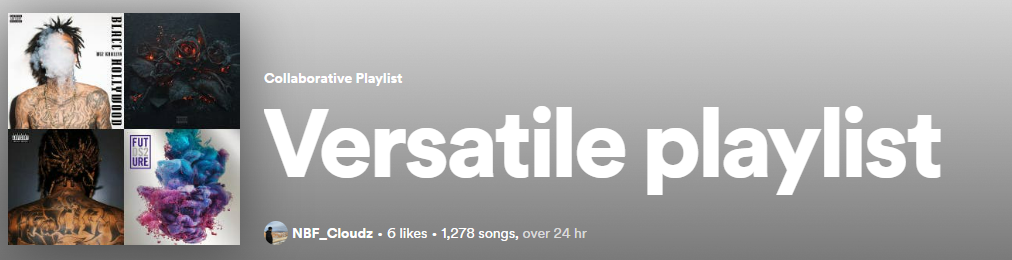

In [9]:
client_id="828da1a7c09144189cf814e3c738f55a"
client_secret="baaf17e643624100bcd1105ba9fb0f84"

playlist_id="4gNdv1hbyAUadHHJH0uDww"

def get_playlist_info(playlist_id, client_id, client_secret):
    
    # Authenticate with Spotify API
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))
    
    # Get playlist tracks
    playlist = sp.playlist_tracks(playlist_id)
    
    if playlist is None or 'items' not in playlist:
        print("Error: Unable to retrieve playlist tracks.")
        return None
    
    tracks = playlist['items']
    
    
    # Continue fetching additional tracks if available
    while playlist['next']:
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])
    
    
    # Initialize lists to store track information
    song_names = []
    song_ids = []
    artist_names = []
    audio_features = []
    
    # Iterate over tracks and retrieve information
    for track in tracks:
        # Get track details
        
        #playlist['items']['track']
        track_info = track['track']
        #playlist['items'][i]['track']['name']
        song_name = track_info['name']
        #playlist['items'][i]['track']['id']
        song_id = track_info['id']
        
        # Get artist names
        artist_names_list = [artist['name'] for artist in track_info['artists']]
        artist_names_str = ', '.join(artist_names_list)
        
        # Get audio features
        audio_feature = sp.audio_features(song_id)
        
        if audio_feature is None:
            print(f"Error: Unable to retrieve audio features for song '{song_name}' with ID '{song_id}'. Skipping...")
            continue
        
        audio_feature = audio_feature[0]
        
        
        # Append information to lists
        song_names.append(song_name)
        song_ids.append(song_id)
        artist_names.append(artist_names_str)
        audio_features.append(audio_feature)
    
    # Create a dictionary to hold the information
    playlist_info = {
        'song_name': song_names,
        'song_id': song_ids,
        'artist_name': artist_names,
        'audio_features': audio_features
    }
    
    #converting it to a df
    df_playlist = pd.DataFrame(playlist_info)
    
    # Separate the audio_features column into multiple columns
    df_audio_features = pd.json_normalize(df_playlist['audio_features'])
    
    # Concatenate the original DataFrame and the audio features DataFrame
    df_playlist = pd.concat([df_playlist, df_audio_features], axis=1)
    
    # Drop the original audio_features column
    df_playlist = df_playlist.drop('audio_features', axis=1)
    
    
    
    return df_playlist

df_playlist2 = get_playlist_info(playlist_id, client_id, client_secret)
df_playlist2

song_name                 song_id  \
0     City View (feat. Courtney Noelle)  26CA1djthnWIk4feadWObF   
1                              Promises  6TL5uq31JarmrpEGTNNyKG   
2           Low Life (feat. The Weeknd)  7EiZI6JVHllARrX9PUvAdX   
3                            Stick Talk  20fAoPjfYltmd3K3bO7gbt   
4                             Big Rings  7jslhIiELQkgW9IHeYNOWE   
...                                 ...                     ...   
1273                             Sci-Fi  73dabjAcAF06vA4C1o16ta   
1274                            LA BABY  0hDE81j4N2DPLbEY4tiCDs   
1275                     Black Skinhead  722tgOgdIbNe3BEyLnejw4   
1276                            Amanece  1LiN0Z98FkR1t0m8KmLcAH   
1277                        DREAMIN' ON  1rxh0iojvTB24C6BpOdfC1   

                          artist_name  danceability  energy  key  loudness  \
0        Wiz Khalifa, Courtney Noelle         0.729   0.656    9    -4.536   
1                         Wiz Khalifa         0.565   0.585    1    -5.723   
2                  Future, The Weeknd         0.722   0.331    8    -7.789   
3                              Future         0.729   0.672    7    -6.749   
4                       Drake, Future         0.776   0.675    8    -6.224   
...                               ...           ...     ...  ...       ...   
1273            Tainy, Rauw Alejandro         0.670   0.924    6    -2.387   
1274  Tainy, Daddy Yankee, Feid, Sech         0.750   0.830    0    -3.544   
1275                       Kanye West         0.766   0.809    1    -6.123   
1276                   Anuel AA, Haze         0.790   0.631    8    -5.549   
1277                           Da-iCE         0.397   0.931    0    -3.072   

      mode  speechiness  acousticness  ...  liveness  valence    tempo  \
0        0       0.0778       0.04630  ...     0.332    0.486  140.029   
1        0       0.0536       0.02650  ...     0.274    0.259  140.800   
2        1       0.0726       0.33700  ...     0.146    0.102  143.961   
3        1       0.2820       0.02650  ...     0.244    0.595  159.903   
4        0       0.2660       0.00196  ...     0.227    0.270  131.984   
...    ...          ...           ...  ...       ...      ...      ...   
1273     0       0.0737       0.15200  ...     0.404    0.402   99.985   
1274     1       0.0683       0.11500  ...     0.765    0.688  104.937   
1275     1       0.2790       0.00110  ...     0.168    0.325  130.127   
1276     0       0.0425       0.43700  ...     0.158    0.889   94.039   
1277     0       0.1130       0.00918  ...     0.146    0.422  170.027   

                type                      id  \
0     audio_features  26CA1djthnWIk4feadWObF   
1     audio_features  6TL5uq31JarmrpEGTNNyKG   
2     audio_features  7EiZI6JVHllARrX9PUvAdX   
3     audio_features  20fAoPjfYltmd3K3bO7gbt   
4     audio_features  7jslhIiELQkgW9IHeYNOWE   
...              ...                     ...   
1273  audio_features  73dabjAcAF06vA4C1o16ta   
1274  audio_features  0hDE81j4N2DPLbEY4tiCDs   
1275  audio_features  722tgOgdIbNe3BEyLnejw4   
1276  audio_features  1LiN0Z98FkR1t0m8KmLcAH   
1277  audio_features  1rxh0iojvTB24C6BpOdfC1   

                                       uri  \
0     spotify:track:26CA1djthnWIk4feadWObF   
1     spotify:track:6TL5uq31JarmrpEGTNNyKG   
2     spotify:track:7EiZI6JVHllARrX9PUvAdX   
3     spotify:track:20fAoPjfYltmd3K3bO7gbt   
4     spotify:track:7jslhIiELQkgW9IHeYNOWE   
...                                    ...   
1273  spotify:track:73dabjAcAF06vA4C1o16ta   
1274  spotify:track:0hDE81j4N2DPLbEY4tiCDs   
1275  spotify:track:722tgOgdIbNe3BEyLnejw4   
1276  spotify:track:1LiN0Z98FkR1t0m8KmLcAH   
1277  spotify:track:1rxh0iojvTB24C6BpOdfC1   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/26CA1djthnWI...   
1     https://api.spotify.com/v1/tracks/6TL5uq31Jarm...   
2     https://api.spotify.com/v1/tracks/7EiZI6JVHllA...   
3     https://api.spotify.com/v1/

### Playlist 3: My Top Songs 2020

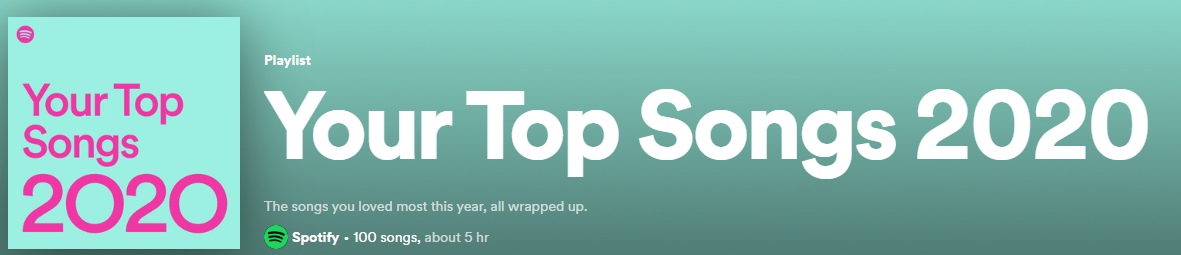

In [10]:
client_id="828da1a7c09144189cf814e3c738f55a"
client_secret="baaf17e643624100bcd1105ba9fb0f84"

playlist_id="37i9dQZF1EM1K5bbXwFc3A"

def get_playlist_info(playlist_id, client_id, client_secret):
    
    # Authenticate with Spotify API
    sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id,
                                                           client_secret=client_secret))
    
    # Get playlist tracks
    playlist = sp.playlist_tracks(playlist_id)
    
    if playlist is None or 'items' not in playlist:
        print("Error: Unable to retrieve playlist tracks.")
        return None
    
    tracks = playlist['items']
    
    
    # Continue fetching additional tracks if available
    while playlist['next']:
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])
    
    
    # Initialize lists to store track information
    song_names = []
    song_ids = []
    artist_names = []
    audio_features = []
    
    # Iterate over tracks and retrieve information
    for track in tracks:
        # Get track details
        
        #playlist['items']['track']
        track_info = track['track']
        #playlist['items'][i]['track']['name']
        song_name = track_info['name']
        #playlist['items'][i]['track']['id']
        song_id = track_info['id']
        
        # Get artist names
        artist_names_list = [artist['name'] for artist in track_info['artists']]
        artist_names_str = ', '.join(artist_names_list)
        
        # Get audio features
        audio_feature = sp.audio_features(song_id)
        
        if audio_feature is None:
            print(f"Error: Unable to retrieve audio features for song '{song_name}' with ID '{song_id}'. Skipping...")
            continue
        
        audio_feature = audio_feature[0]
        
        
        # Append information to lists
        song_names.append(song_name)
        song_ids.append(song_id)
        artist_names.append(artist_names_str)
        audio_features.append(audio_feature)
    
    # Create a dictionary to hold the information
    playlist_info = {
        'song_name': song_names,
        'song_id': song_ids,
        'artist_name': artist_names,
        'audio_features': audio_features
    }
    
    #converting it to a df
    df_playlist = pd.DataFrame(playlist_info)
    
    # Separate the audio_features column into multiple columns
    df_audio_features = pd.json_normalize(df_playlist['audio_features'])
    
    # Concatenate the original DataFrame and the audio features DataFrame
    df_playlist = pd.concat([df_playlist, df_audio_features], axis=1)
    
    # Drop the original audio_features column
    df_playlist = df_playlist.drop('audio_features', axis=1)
    
    
    
    return df_playlist

df_playlist3 = get_playlist_info(playlist_id, client_id, client_secret)
df_playlist3

song_name                 song_id  \
0                                  Physical  3AzjcOeAmA57TIOr9zF1ZW   
1              I’m Ready (with Demi Lovato)  1fipvP2zmef6vN2IwXfJhY   
2                                   So Am I  0uUNN1nSoUx1A4fkDCWDQ7   
3                               Run Run Run  08KyjbAXbJl0EdtTi7GH3x   
4                        Warrior (Stand Up)  4IUeuZLyVjYJZj0NQVQCPI   
..                                      ...                     ...   
95                                 Shekayat  2UZzcPM7OIRcrlhmbyxV9d   
96                                  Sixteen  4PkIDTPGedm0enzdvilLNd   
97  Dusk Till Dawn (feat. Sia) - Radio Edit  1j4kHkkpqZRBwE0A4CN4Yv   
98                        Harleys In Hawaii  5nCthAh3jt4xKuLJAifAaR   
99                                Shameless  2ogKhhoMClkFXek7ZgxAhN   

                 artist_name  danceability  energy  key  loudness  mode  \
0                   Dua Lipa         0.647   0.844    0    -3.756     1   
1     Sam Smith, Demi Lovato         0.501   0.674    5    -6.363     1   
2                    Ava Max         0.682   0.656    6    -4.670     1   
3         Celeste Buckingham         0.673   0.688    3    -5.752     0   
4   Hidden Citizens, Rayelle         0.456   0.701    1    -3.056     0   
..                       ...           ...     ...  ...       ...   ...   
95                    Sogand         0.621   0.344    0    -9.574     0   
96            Ellie Goulding         0.669   0.801    8    -5.445     1   
97                 ZAYN, Sia         0.259   0.437   11    -6.589     0   
98                Katy Perry         0.722   0.757   10    -6.207     0   
99            Camila Cabello         0.377   0.651    4    -5.437     0   

    speechiness  acousticness  ...  liveness  valence    tempo  \
0        0.0457       0.01370  ...    0.1020   0.7460  146.967   
1        0.0408       0.00346  ...    0.2820   0.1520  155.051   
2        0.0435       0.07370  ...    0.3530   0.6070  130.089   
3        0.1750       0.10700  ...    0.0310   0.7020  162.045   
4        0.0638       0.03830  ...    0.1280   0.3100  128.604   
..          ...           ...  ...       ...      ...      ...   
95       0.0472       0.71200  ...    0.0620   0.4230  115.048   
96       0.1360       0.26800  ...    0.0594   0.5410  109.919   
97       0.0386       0.10200  ...    0.1060   0.0951  180.042   
98       0.1320       0.18500  ...    0.1260   0.7210  140.094   
99       0.0589       0.01970  ...    0.1740   0.0851  129.607   

              type                      id  \
0   audio_features  3AzjcOeAmA57TIOr9zF1ZW   
1   audio_features  1fipvP2zmef6vN2IwXfJhY   
2   audio_features  0uUNN1nSoUx1A4fkDCWDQ7   
3   audio_features  08KyjbAXbJl0EdtTi7GH3x   
4   audio_features  4IUeuZLyVjYJZj0NQVQCPI   
..             ...                     ...   
95  audio_features  2UZzcPM7OIRcrlhmbyxV9d   
96  audio_features  4PkIDTPGedm0enzdvilLNd   
97  audio_features  1j4kHkkpqZRBwE0A4CN4Yv   
98  audio_features  5nCthAh3jt4xKuLJAifAaR   
99  audio_features  2ogKhhoMClkFXek7ZgxAhN   

                                     uri  \
0   spotify:track:3AzjcOeAmA57TIOr9zF1ZW   
1   spotify:track:1fipvP2zmef6vN2IwXfJhY   
2   spotify:track:0uUNN1nSoUx1A4fkDCWDQ7   
3   spotify:track:08KyjbAXbJl0EdtTi7GH3x   
4   spotify:track:4IUeuZLyVjYJZj0NQVQCPI   
..                                   ...   
95  spotify:track:2UZzcPM7OIRcrlhmbyxV9d   
96  spotify:track:4PkIDTPGedm0enzdvilLNd   
97  spotify:track:1j4kHkkpqZRBwE0A4CN4Yv   
98  spotify:track:5nCthAh3jt4xKuLJAifAaR   
99  spotify:track:2ogKhhoMClkFXek7ZgxAhN   

                                           track_href  \
0   https://api.spotify.com/v1/tracks/3AzjcOeAmA57...   
1   https://api.spotify.com/v1/tracks/1fipvP2zmef6...   
2   https://api.spotify.com/v1/tracks/0uUNN1nSoUx1...   
3   https://api.spotify.com/v1/tracks/08KyjbAXbJl0...   
4   https://api.spotify.com/v1/tracks/4IUeuZLyVjYJ...   
..                                                ...   
95  ht

### Concating 3 Playlists

In [11]:
combined_df = pd.concat([df_playlist1, df_playlist2, df_playlist3], ignore_index=True)
combined_df

song_name                 song_id  \
0                                         TQG  2oMjKuKUEJFuLiVmTq7Vjx   
1       Shakira: Bzrp Music Sessions, Vol. 53  4nrPB8O7Y7wsOCJdgXkthe   
2                               Runaway Romeo  2IQg4g8vZfNr5AlZnkNqb4   
3                                     Flowers  0yLdNVWF3Srea0uzk55zFn   
4     Left and Right (Feat. Jung Kook of BTS)  0mBP9X2gPCuapvpZ7TGDk3   
...                                       ...                     ...   
1873                                 Shekayat  2UZzcPM7OIRcrlhmbyxV9d   
1874                                  Sixteen  4PkIDTPGedm0enzdvilLNd   
1875  Dusk Till Dawn (feat. Sia) - Radio Edit  1j4kHkkpqZRBwE0A4CN4Yv   
1876                        Harleys In Hawaii  5nCthAh3jt4xKuLJAifAaR   
1877                                Shameless  2ogKhhoMClkFXek7ZgxAhN   

                       artist_name  danceability  energy  key  loudness  mode  \
0                 KAROL G, Shakira         0.839   0.650    4    -3.380     0   
1                Bizarrap, Shakira         0.778   0.632    2    -5.600     0   
2                       Lee Isaacs         0.494   0.667    4    -7.234     1   
3                      Miley Cyrus         0.707   0.681    0    -4.325     1   
4     Charlie Puth, Jung Kook, BTS         0.881   0.592    2    -4.898     1   
...                            ...           ...     ...  ...       ...   ...   
1873                        Sogand         0.621   0.344    0    -9.574     0   
1874                Ellie Goulding         0.669   0.801    8    -5.445     1   
1875                     ZAYN, Sia         0.259   0.437   11    -6.589     0   
1876                    Katy Perry         0.722   0.757   10    -6.207     0   
1877                Camila Cabello         0.377   0.651    4    -5.437     0   

      speechiness  acousticness  ...  liveness  valence    tempo  \
0          0.2120        0.6660  ...    0.1260   0.7000   90.015   
1          0.0493        0.2740  ...    0.0915   0.4980  122.104   
2          0.0336        0.3630  ...    0.0992   0.2820   79.993   
3          0.0668        0.0632  ...    0.0322   0.6460  117.999   
4          0.0324        0.6190  ...    0.0901   0.7190  101.058   
...           ...           ...  ...       ...      ...      ...   
1873       0.0472        0.7120  ...    0.0620   0.4230  115.048   
1874       0.1360        0.2680  ...    0.0594   0.5410  109.919   
1875       0.0386        0.1020  ...    0.1060   0.0951  180.042   
1876       0.1320        0.1850  ...    0.1260   0.7210  140.094   
1877       0.0589        0.0197  ...    0.1740   0.0851  129.607   

                type                      id  \
0     audio_features  2oMjKuKUEJFuLiVmTq7Vjx   
1     audio_features  4nrPB8O7Y7wsOCJdgXkthe   
2     audio_features  2IQg4g8vZfNr5AlZnkNqb4   
3     audio_features  0yLdNVWF3Srea0uzk55zFn   
4     audio_features  0mBP9X2gPCuapvpZ7TGDk3   
...              ...                     ...   
1873  audio_features  2UZzcPM7OIRcrlhmbyxV9d   
1874  audio_features  4PkIDTPGedm0enzdvilLNd   
1875  audio_features  1j4kHkkpqZRBwE0A4CN4Yv   
1876  audio_features  5nCthAh3jt4xKuLJAifAaR   
1877  audio_features  2ogKhhoMClkFXek7ZgxAhN   

                                       uri  \
0     spotify:track:2oMjKuKUEJFuLiVmTq7Vjx   
1     spotify:track:4nrPB8O7Y7wsOCJdgXkthe   
2     spotify:track:2IQg4g8vZfNr5AlZnkNqb4   
3     spotify:track:0yLdNVWF3Srea0uzk55zFn   
4     spotify:track:0mBP9X2gPCuapvpZ7TGDk3   
...                                    ...   
1873  spotify:track:2UZzcPM7OIRcrlhmbyxV9d   
1874  spotify:track:4PkIDTPGedm0enzdvilLNd   
1875  spotify:track:1j4kHkkpqZRBwE0A4CN4Yv   
1876  spotify:track:5nCthAh3jt4xKuLJAifAaR   
1877  spotify:track:2ogKhhoMClkFXek7ZgxAhN   

                                             track_href  \
0     https://api.spotify.com/v1/tracks/2oMjKuKUEJFu...   
1     https://api.spotify.com/v1/tracks/4nrPB8O7Y7ws...   
2     https://api.spotify.com/v1/tracks/2IQg4g8vZfNr...   
3  

In [12]:
#Checking number of duplicates

combined_df.duplicated().sum()

7

In [13]:
#Droping duplicates

combined_df=combined_df.drop_duplicates().reset_index(drop=True)

In [14]:
combined_df.duplicated().sum()

0

# Clustering

In [35]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

### Scaling the data

In [16]:
#creating a new df with the cols I need to scale

X= combined_df[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
X.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.839   0.650    4    -3.380     0       0.2120        0.6660   
1         0.778   0.632    2    -5.600     0       0.0493        0.2740   
2         0.494   0.667    4    -7.234     1       0.0336        0.3630   
3         0.707   0.681    0    -4.325     1       0.0668        0.0632   
4         0.881   0.592    2    -4.898     1       0.0324        0.6190   

   instrumentalness  liveness  valence    tempo  
0          0.000000    0.1260    0.700   90.015  
1          0.000000    0.0915    0.498  122.104  
2          0.000104    0.0992    0.282   79.993  
3          0.000005    0.0322    0.646  117.999  
4          0.000013    0.0901    0.719  101.058

In [17]:
print(X.dtypes)

danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object


In [18]:
# standarize the data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

danceability    energy       key  loudness      mode  speechiness  \
0      1.199147  0.137787 -0.334581  1.253747 -1.163383     1.199107   
1      0.793346  0.032533 -0.889546  0.370782 -1.163383    -0.490836   
2     -1.095954  0.237193 -0.334581 -0.279112  0.859562    -0.653909   
3      0.321021  0.319058 -1.444511  0.877891  0.859562    -0.309065   
4      1.478550 -0.201365 -0.889546  0.649990  0.859562    -0.666373   

   acousticness  instrumentalness  liveness   valence     tempo  
0      1.689469         -0.179738 -0.394527  0.881698 -1.246996  
1      0.128704         -0.179738 -0.663683  0.057828 -0.085019  
2      0.483061         -0.178631 -0.603611 -0.823141 -1.609904  
3     -0.710606         -0.179683 -1.126319  0.661456 -0.233665  
4      1.502336         -0.179598 -0.674605  0.959191 -0.847117

In [19]:
print(X_scaled.dtypes)

danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object


In [20]:
X_scaled.describe()

danceability        energy           key      loudness          mode  \
count  1.871000e+03  1.871000e+03  1.871000e+03  1.871000e+03  1.871000e+03   
mean   1.367159e-16  4.025523e-16 -9.873924e-17  2.088715e-16  8.354858e-17   
std    1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00  1.000267e+00   
min   -3.098346e+00 -3.519208e+00 -1.444511e+00 -6.571629e+00 -1.163383e+00   
25%   -6.169761e-01 -6.516190e-01 -8.895460e-01 -4.972677e-01 -1.163383e+00   
50%    1.347524e-01  1.499022e-02 -5.709824e-02  1.524274e-01  8.595624e-01   
75%    7.434530e-01  7.108367e-01  7.753495e-01  6.734563e-01  8.595624e-01   
max    2.083925e+00  2.096682e+00  1.607797e+00  2.113644e+00  8.595624e-01   

        speechiness  acousticness  instrumentalness      liveness  \
count  1.871000e+03  1.871000e+03      1.871000e+03  1.871000e+03   
mean   4.557196e-17  5.316728e-17      7.595326e-18 -7.215560e-17   
std    1.000267e+00  1.000267e+00      1.000267e+00  1.000267e+00   
min   -7.650486e-01 -9.622057e-01     -1.797382e-01 -1.184051e+00   
25%   -6.071684e-01 -8.165151e-01     -1.797382e-01 -6.153131e-01   
50%   -4.326691e-01 -4.008419e-01     -1.797382e-01 -3.945272e-01   
75%    1.396469e-01  6.025074e-01     -1.790710e-01  2.764121e-01   
max    5.551201e+00  2.979489e+00      9.980751e+00  5.862372e+00   

            valence         tempo  
count  1.871000e+03  1.871000e+03  
mean   3.038130e-17  1.405135e-16  
std    1.000267e+00  1.000267e+00  
min   -1.819942e+00 -2.742405e+00  
25%   -7.823557e-01 -7.097322e-01  
50%   -1.216284e-01 -1.813667e-02  
75%    7.838127e-01  6.382798e-01  
max    2.031853e+00  3.024717e+00

### Visualizing the results of clustering without tuning the K

In [21]:
from sklearn.decomposition import PCA

pca = PCA(2) #reducing the cols to 2
X_2D = pca.fit_transform(X_scaled)
X_2D

array([[-0.41658136, -2.11379528],
       [-0.27031436, -0.62503935],
       [ 0.96364927,  0.92062139],
       ...,
       [ 1.04795775,  2.04965033],
       [-1.1125505 , -1.10240629],
       [-0.05506866,  1.78979617]])

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_2D)

C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [23]:
clusters = kmeans.predict(X_2D)
clusters

array([0, 0, 1, ..., 1, 0, 2])

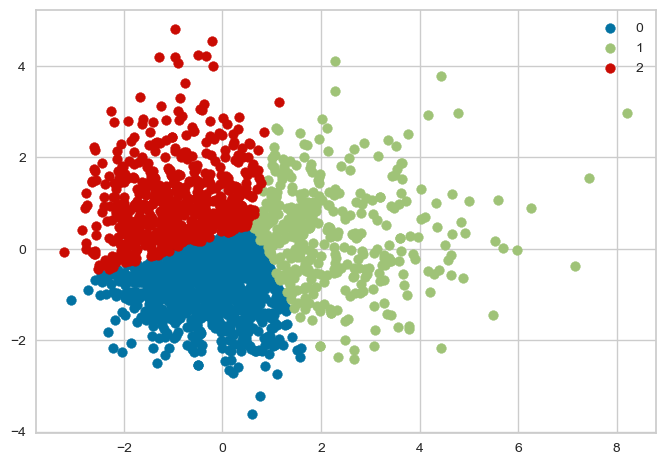

In [24]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

### Choosing the best K

#### Inertia: 
Calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

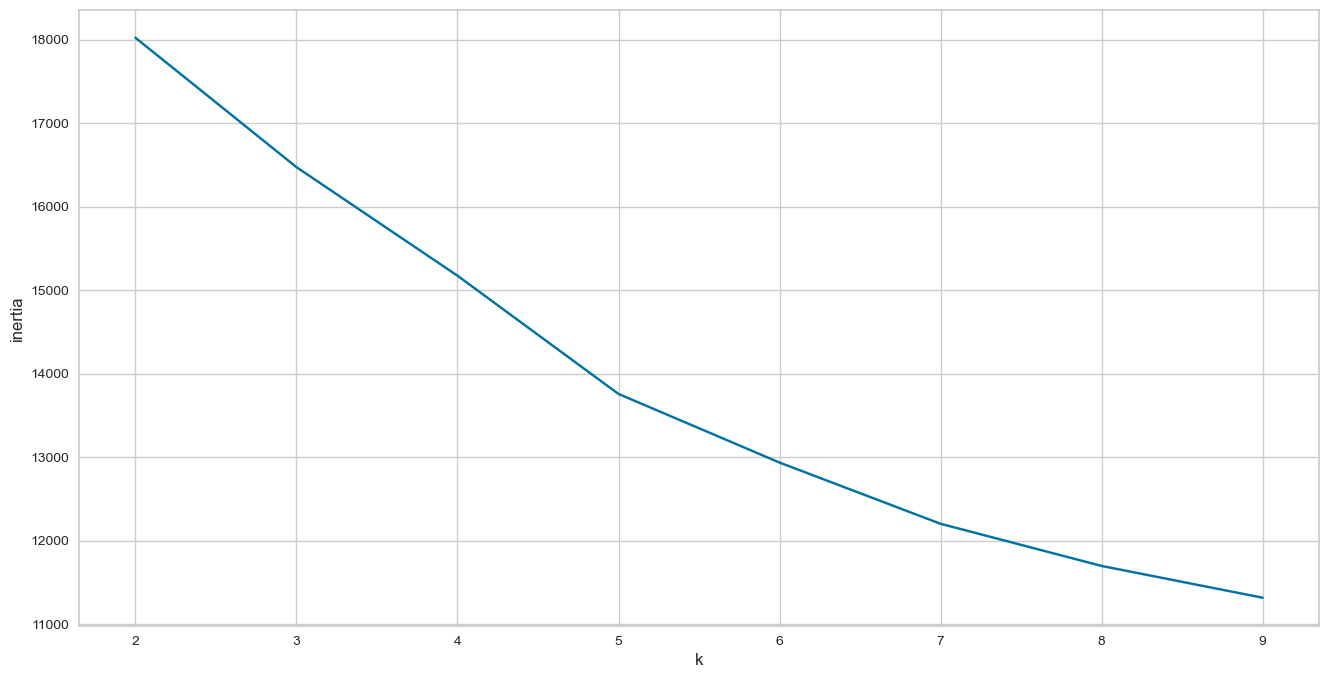

In [25]:
K = range(2, 10)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

inertia

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

#### Seems like the elbow shows the value 5 is the best for our K

#### Silhouette Score
Calculated using the mean distance of the points and it's centroid and the mean nearest-cluster distance for each sample. Measures the average of how similar each point is to its cluster.

C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

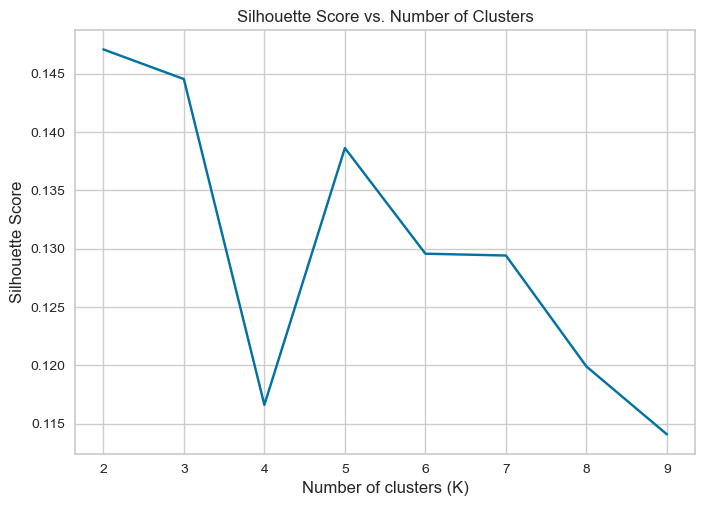

In [26]:
K = range(2, 10)

silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [27]:
K = range(2, 12)
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

for k, score in zip(K, silhouette_scores):
    print(f"Silhouette Score for {k} clusters: {score}")

C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

Silhouette Score for 2 clusters: 0.14788013054331892
Silhouette Score for 3 clusters: 0.14440082084021325
Silhouette Score for 4 clusters: 0.1291116686985127
Silhouette Score for 5 clusters: 0.12785384457012144
Silhouette Score for 6 clusters: 0.12974984077415602
Silhouette Score for 7 clusters: 0.12856341867882784
Silhouette Score for 8 clusters: 0.11961898626260198
Silhouette Score for 9 clusters: 0.11562012076624248
Silhouette Score for 10 clusters: 0.11787017284294192
Silhouette Score for 11 clusters: 0.11528852124437085


#### Silhouette Scores shows 2 as the best score following by 3!

C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available th

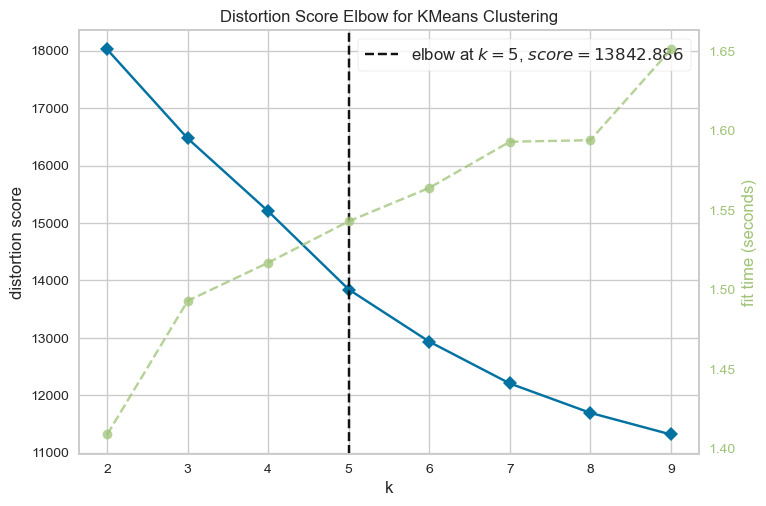

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof()   

#### KElbowVisualizer shows 5 as the best K.

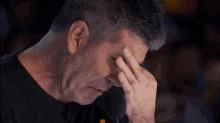

C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

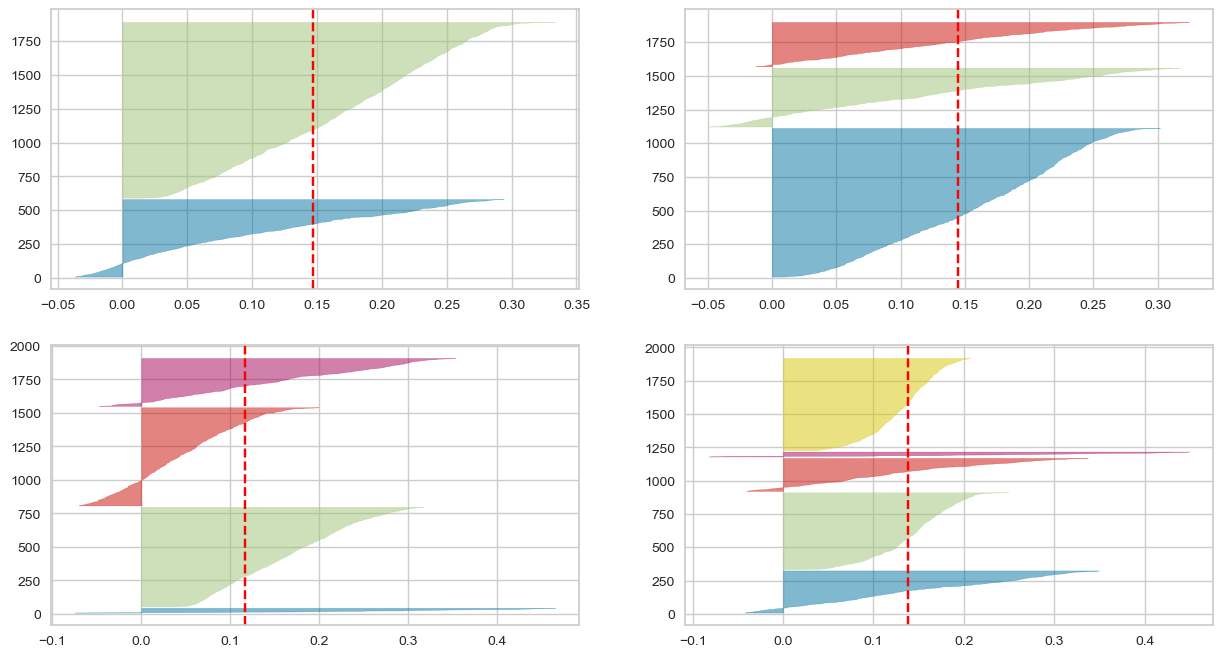

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8))

for idx, i in enumerate([2, 3, 4, 5]):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(idx, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(X_scaled)

All the clusters are above average but in each option there is at least a cluster with negative value which shows the clustering is not performing well.

### What Value should I Pick for K?

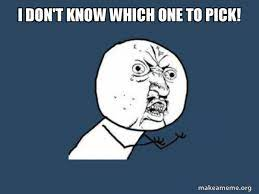

### I will choose k=2

In [43]:
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\949haghaei\Videos\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [44]:
clusters

array([1, 1, 0, ..., 0, 1, 1])

In [45]:
s_score = metrics.silhouette_score(X_scaled, clusters)
s_score

0.14709231839460107

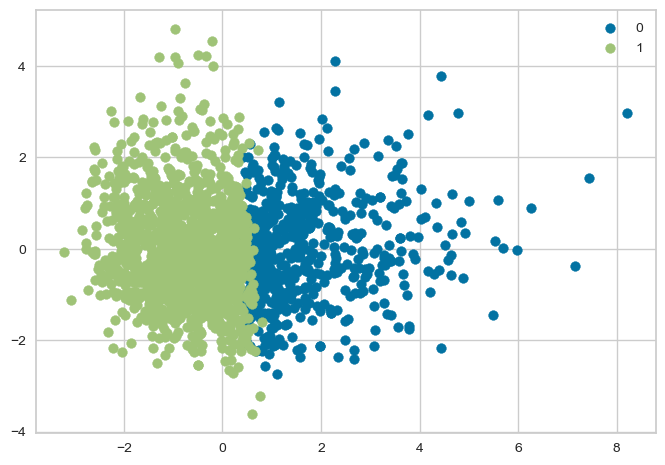

In [33]:
labels = np.unique(clusters)

for i in labels:
    plt.scatter(X_2D[clusters == i , 0] , X_2D[clusters == i , 1] , label = i)
plt.legend()
plt.show()

In [46]:
#create a new df with title, artist and cluster assigned

scaled_df = pd.DataFrame(X_scaled, columns=X_scaled.columns)
scaled_df['song_name'] = combined_df['song_name']
scaled_df['song_id'] = combined_df['song_id']
scaled_df['artist_name'] = combined_df['artist_name']
scaled_df['cluster'] = clusters
scaled_df

danceability    energy       key  loudness      mode  speechiness  \
0         1.199147  0.137787 -0.334581  1.253747 -1.163383     1.199107   
1         0.793346  0.032533 -0.889546  0.370782 -1.163383    -0.490836   
2        -1.095954  0.237193 -0.334581 -0.279112  0.859562    -0.653909   
3         0.321021  0.319058 -1.444511  0.877891  0.859562    -0.309065   
4         1.478550 -0.201365 -0.889546  0.649990  0.859562    -0.666373   
...            ...       ...       ...       ...       ...          ...   
1866     -0.251091 -1.651533 -1.444511 -1.209805 -1.163383    -0.512648   
1867      0.068228  1.020751  0.775350  0.432431  0.859562     0.409705   
1868     -2.659283 -1.107720  1.607797 -0.022575 -1.163383    -0.601975   
1869      0.420808  0.763464  1.330315  0.129359 -1.163383     0.368158   
1870     -1.874292  0.143634 -0.334581  0.435613 -1.163383    -0.391122   

      acousticness  instrumentalness  liveness   valence     tempo  \
0         1.689469         -0.179738 -0.394527  0.881698 -1.246996   
1         0.128704         -0.179738 -0.663683  0.057828 -0.085019   
2         0.483061         -0.178631 -0.603611 -0.823141 -1.609904   
3        -0.710606         -0.179683 -1.126319  0.661456 -0.233665   
4         1.502336         -0.179598 -0.674605  0.959191 -0.847117   
...            ...               ...       ...       ...       ...   
1866      1.872620         -0.179738 -0.893831 -0.248064 -0.340524   
1867      0.104814         -0.179738 -0.914115  0.233207 -0.526251   
1868     -0.556122         -0.179724 -0.550560 -1.585425  2.012980   
1869     -0.225654         -0.179671 -0.394527  0.967348  0.566419   
1870     -0.883803         -0.179173 -0.020049 -1.626210  0.186673   

                                    song_name                 song_id  \
0                                         TQG  2oMjKuKUEJFuLiVmTq7Vjx   
1       Shakira: Bzrp Music Sessions, Vol. 53  4nrPB8O7Y7wsOCJdgXkthe   
2                               Runaway Romeo  2IQg4g8vZfNr5AlZnkNqb4   
3                                     Flowers  0yLdNVWF3Srea0uzk55zFn   
4     Left and Right (Feat. Jung Kook of BTS)  0mBP9X2gPCuapvpZ7TGDk3   
...                                       ...                     ...   
1866                                 Shekayat  2UZzcPM7OIRcrlhmbyxV9d   
1867                                  Sixteen  4PkIDTPGedm0enzdvilLNd   
1868  Dusk Till Dawn (feat. Sia) - Radio Edit  1j4kHkkpqZRBwE0A4CN4Yv   
1869                        Harleys In Hawaii  5nCthAh3jt4xKuLJAifAaR   
1870                                Shameless  2ogKhhoMClkFXek7ZgxAhN   

                       artist_name  cluster  
0                 KAROL G, Shakira        1  
1                Bizarrap, Shakira        1  
2                       Lee Isaacs        0  
3                      Miley Cyrus        1  
4     Charlie Puth, Jung Kook, BTS        1  
...                            ...      ...  
1866                        Sogand        0  
1867                Ellie Goulding        1  
1868                     ZAYN, Sia        0  
1869                    Katy Perry        1  
1870                Camila Cabello        1  

[1871 rows x 15 columns]

In [49]:
scaled_df.cluster.value_counts()

1    1298
0     573
Name: cluster, dtype: int64

In [47]:
# Check out a song_name 'Shekayat'
scaled_df[scaled_df['song_name'].str.contains('Shekayat')]

danceability    energy       key  loudness      mode  speechiness  \
1866     -0.251091 -1.651533 -1.444511 -1.209805 -1.163383    -0.512648   

      acousticness  instrumentalness  liveness   valence     tempo song_name  \
1866       1.87262         -0.179738 -0.893831 -0.248064 -0.340524  Shekayat   

                     song_id artist_name  cluster  
1866  2UZzcPM7OIRcrlhmbyxV9d      Sogand        0

# Song Recommender

1. Ask for the input
2. Look for the song using the Spotify lib t  find the audio features
3. if the somg is in df_billboard recommend another song from the same df
4. if the song is not there fins a similar song from the scaled_df which includes 1871 songs from Spotify 

In [54]:
def song_recommender():
    
    # get song id
    user_song = input("Choose a song to get a recommendation :): ")
    
    
    
    if df_billboard['song'].str.contains(user_song, case=False).any():
            recomendation = df_billboard.sample(1)
            song_title = recomendation['song'].tolist()[0]
            artist = recomendation['Artist'].tolist()[0]
            print('\n[Here is our recommendation]')
            return f"{recomendation['song'].values[0]} - {recomendation['artist'].values[0]}"
        
        
        
    #If the song was not in the Billboard df
    else:
        
        #look for the song using Spotipy
        results = sp.search(q=f'track:{user_song}', limit=1)
        track_id = results['tracks']['items'][0]['id']
        
        # get song features with the retreived track id
        audio_features_user_song = sp.audio_features(track_id)
        
        # create a dataframe
        df_user_song = pd.DataFrame(audio_features_user_song)
        new_features = df_user_song[X.columns]
        
        # scale features
        scaled_x_user_song = scaler.transform(new_features)
        
        # predict cluster
        cluster = kmeans.predict(scaled_x_user_song)
        
        
        # Filter dataset to predicted cluster
        filtered_df = scaled_df[scaled_df['cluster'] == cluster[0]][x.columns]
        
        # get closest song from filtered dataset
        closest, _ = pairwise_distances_argmin_min(scaled_x_user_song, filtered_df)
        
        # return it in a readable way
        print('\n [Here is our recommendation]')
        return ' - '.join([scaled_df.loc[closest]['song_name'].values[0], scaled_df.loc[closest]['artist'].values[0]])
    

In [ ]:
song_recommender()